# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [38]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [39]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [40]:
df['sex'].replace({0:'feminino', 1:'masculino'}, inplace = True)
df['flag_doente'].replace({0:'saudáveis', 1:'doentes'}, inplace = True)

In [41]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins = True)
tab['percentual_doentes'] = tab['doentes'] / tab['All']
tab['Odds_doentes'] = tab['percentual_doentes'] / (1 - tab['percentual_doentes'])
tab['Odds_ratio'] = tab['Odds_doentes']/tab.loc['All','Odds_doentes']
tab['Logito_doentes'] = np.log(tab['Odds_doentes'])
tab['WOE'] = np.log(tab['Odds_ratio'])
tab

flag_doente,doentes,saudáveis,All,percentual_doentes,Odds_doentes,Odds_ratio,Logito_doentes,WOE
sex,,,,,,,,
feminino,25,72,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
masculino,114,92,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [42]:
df.age.min()

29.0

In [43]:
df.age.max()

77.0

In [44]:
# Valor médio da variável age

df.age.mean()

54.43894389438944

In [45]:
# Agrupando 5 grupos de 10 de 28 anos até 77 anos

bins = [28, 38, 48, 58, 68, 78]
labels = ['28 a 37 anos', '38 a 47 anos', '48 a 57 anos', '58 a 67 anos', '68 a 77 anos']

df['age_group'] = pd.cut(df['age'], bins = bins, labels = labels, right = False)

In [46]:
tab = pd.crosstab(df['age_group'], df['flag_doente'], margins = True)
tab['percentual_doentes'] = tab['doentes'] / tab['All']
tab['Odds_doentes'] = tab['percentual_doentes'] / (1 - tab['percentual_doentes'])
tab['Odds_ratio'] = tab['Odds_doentes']/tab.loc['All','Odds_doentes']
tab['Logito_doentes'] = np.log(tab['Odds_doentes'])
tab['WOE'] = np.log(tab['Odds_ratio'])
tab

flag_doente,doentes,saudáveis,All,percentual_doentes,Odds_doentes,Odds_ratio,Logito_doentes,WOE
age_group,,,,,,,,
28 a 37 anos,2,7,9,0.222222,0.285714,0.337102,-1.252763,-1.087370
38 a 47 anos,19,47,66,0.287879,0.404255,0.476963,-0.905709,-0.740316
48 a 57 anos,44,60,104,0.423077,0.733333,0.865228,-0.310155,-0.144762
58 a 67 anos,67,40,107,0.626168,1.675000,1.976259,0.515813,0.681206
68 a 77 anos,7,10,17,0.411765,0.700000,0.825899,-0.356675,-0.191282
All,139,164,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

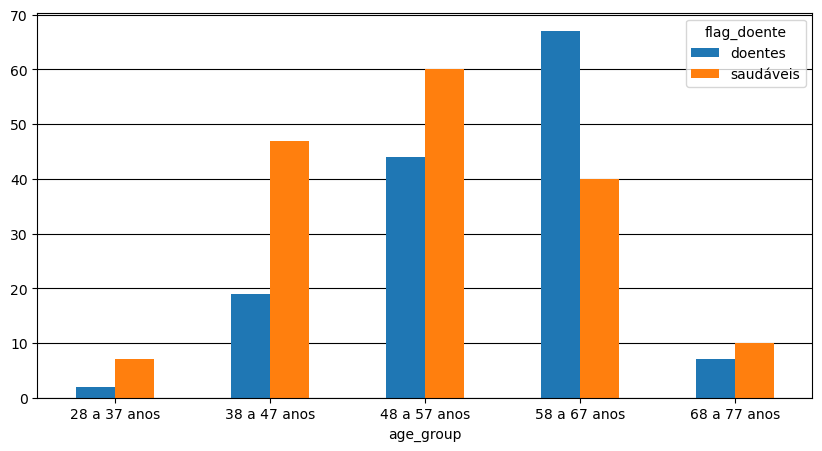

In [47]:
(tab[['doentes','saudáveis']]
         .drop('All')
         .plot.bar(rot=0, figsize=(10, 5), zorder = 2)
         .grid(zorder = 1, color='black', axis='y'))

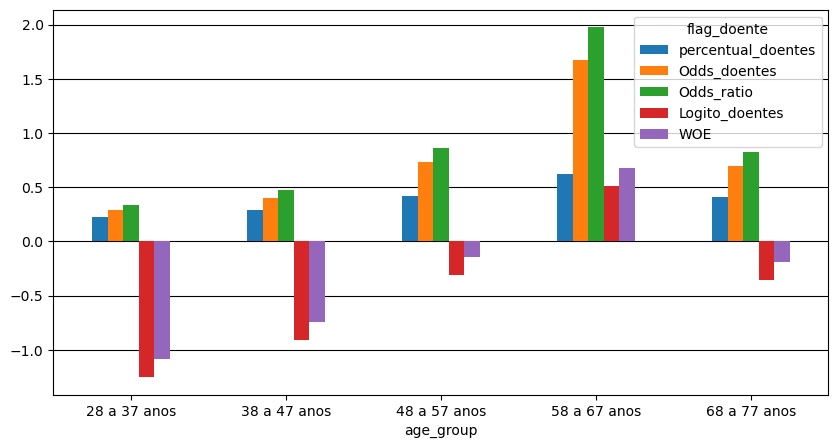

In [48]:
(tab[['percentual_doentes', 'Odds_doentes', 'Odds_ratio', 'Logito_doentes', 'WOE']]
         .drop('All')
         .plot.bar(rot=0, figsize=(10, 5), zorder = 2)
         .grid(zorder = 1, color='black', axis='y'))